In [364]:
import pandas as pd

In [365]:
df = pd.read_csv('dados_produtos.csv',sep=',')

In [366]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [367]:
#Criando um dicionario para substituir o nome de cada coluna
dicionario = {
    'product_name':'Nome do Produto', 'rating':'Avaliação',
    'rating_count':'Quantidade de Avaliações', 
    'purchased':'Comprou'
}

In [368]:
df.rename(columns=dicionario,inplace=True) #Renomeia as colunas do dataframe

In [369]:
df.head()

,Nome do Produto,Avaliação,Quantidade de Avaliações,Comprou
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [370]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,f1_score,recall_score
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nome do Produto           100 non-null    object 
 1   Avaliação                 100 non-null    float64
 2   Quantidade de Avaliações  100 non-null    int64  
 3   Comprou                   100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [372]:
df.describe()

,Avaliação,Quantidade de Avaliações,Comprou
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


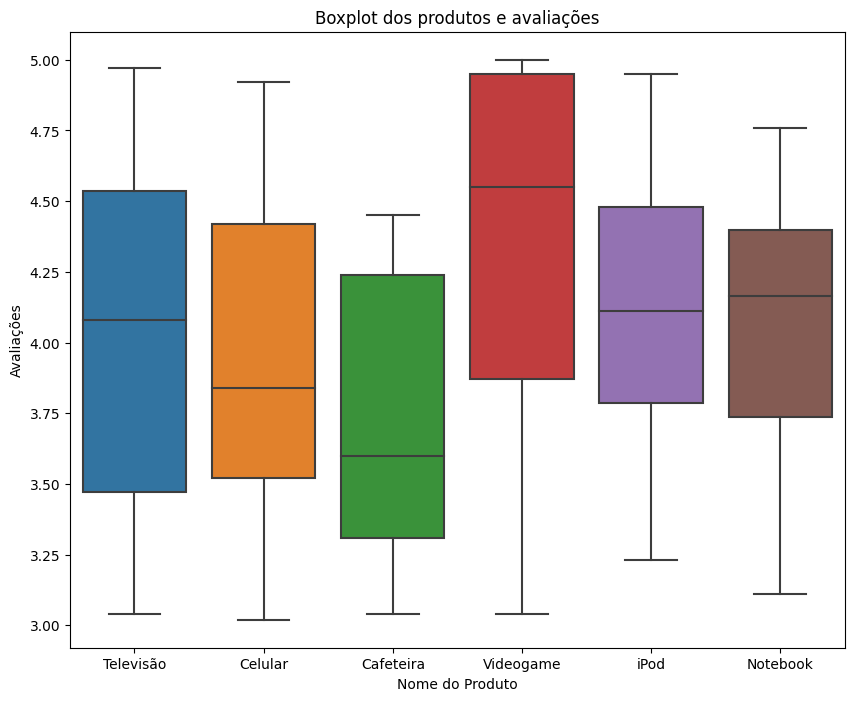

In [373]:
plt.figure(figsize=(10,8))
coluna_x = 'Nome do Produto'  # A coluna que irá para o eixo x
coluna_y = 'Avaliação'  # A coluna que irá para o eixo y (valores a serem plotados)

sns.boxplot(x=coluna_x, y=coluna_y, data=df)
plt.title('Boxplot dos produtos e avaliações')
plt.ylabel('Avaliações')
plt.xlabel('Nome do Produto')

# Exibir o gráfico
plt.show()



--
Árvore de Decisão do Produto: Televisão
--

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.5
Precision Score: 1.0
Recall Score: 0.3333333333333333
Confusion Matrix:
[[1 0]
 [2 1]]



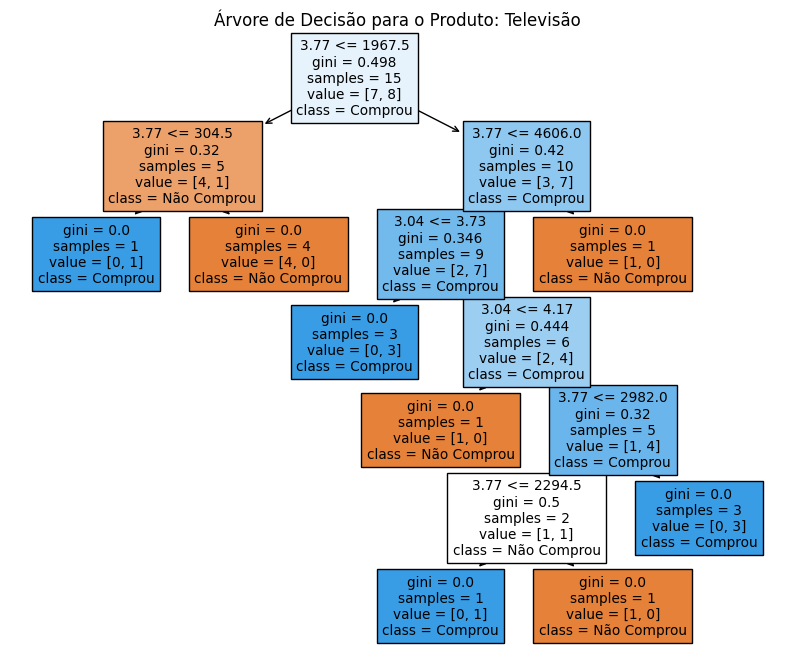


--
Árvore de Decisão do Produto: Celular
--

Avaliação do Modelo: 

Accuracy Score: 0.6
F1 Score: 0.6666666666666666
Precision Score: 0.5
Recall Score: 1.0
Confusion Matrix:
[[1 2]
 [0 2]]



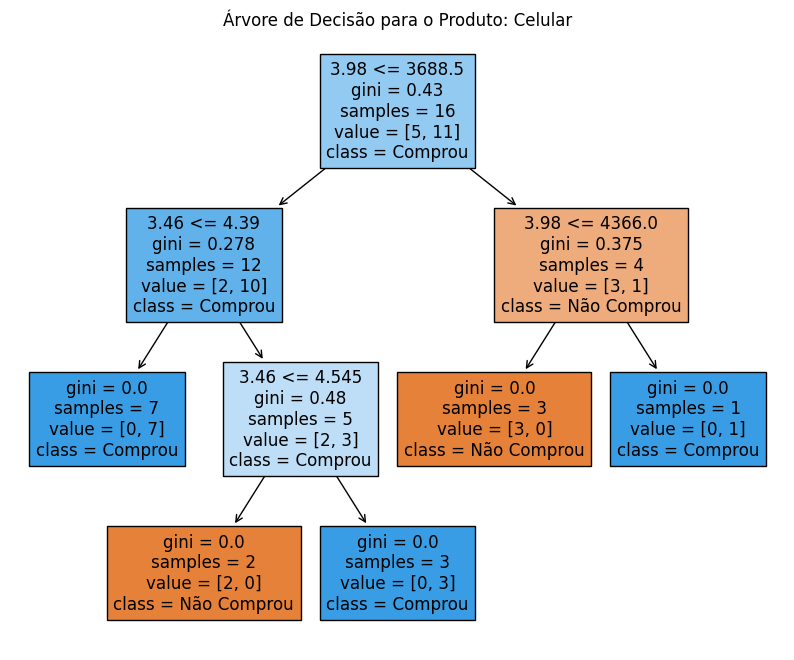


--
Árvore de Decisão do Produto: Cafeteira
--

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix:
[[1 0]
 [1 0]]



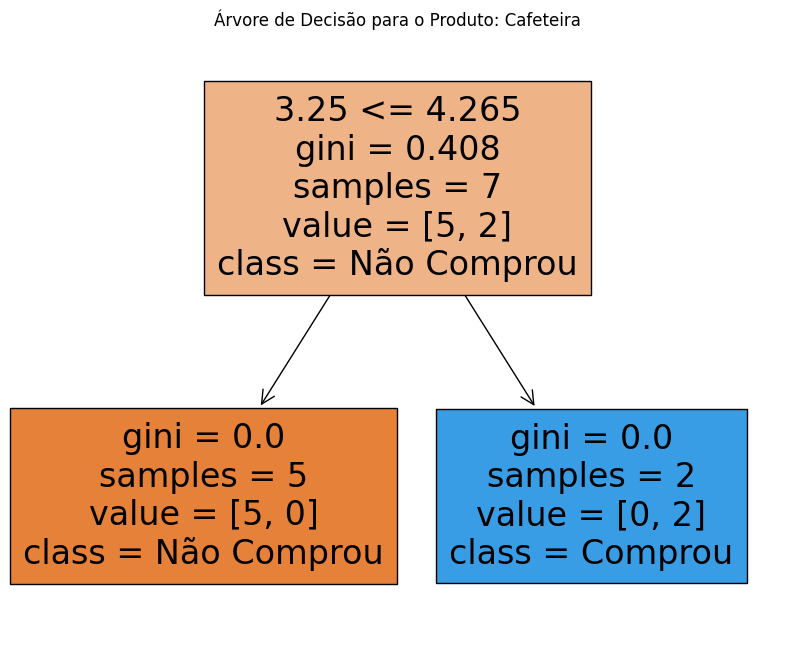


--
Árvore de Decisão do Produto: Videogame
--

Avaliação do Modelo: 

Accuracy Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Confusion Matrix:
[[4]]



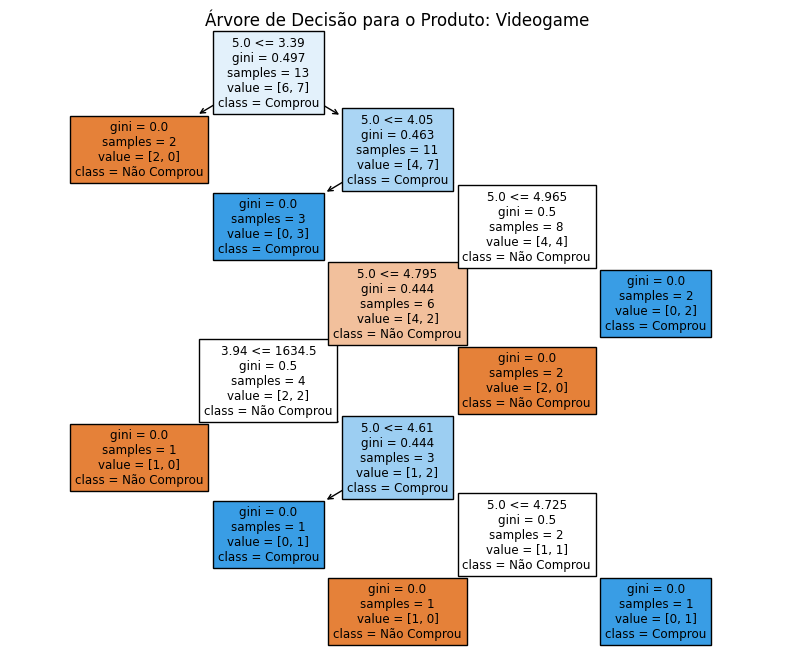


--
Árvore de Decisão do Produto: iPod
--

Avaliação do Modelo: 

Accuracy Score: 0.25
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix:
[[1 1]
 [2 0]]



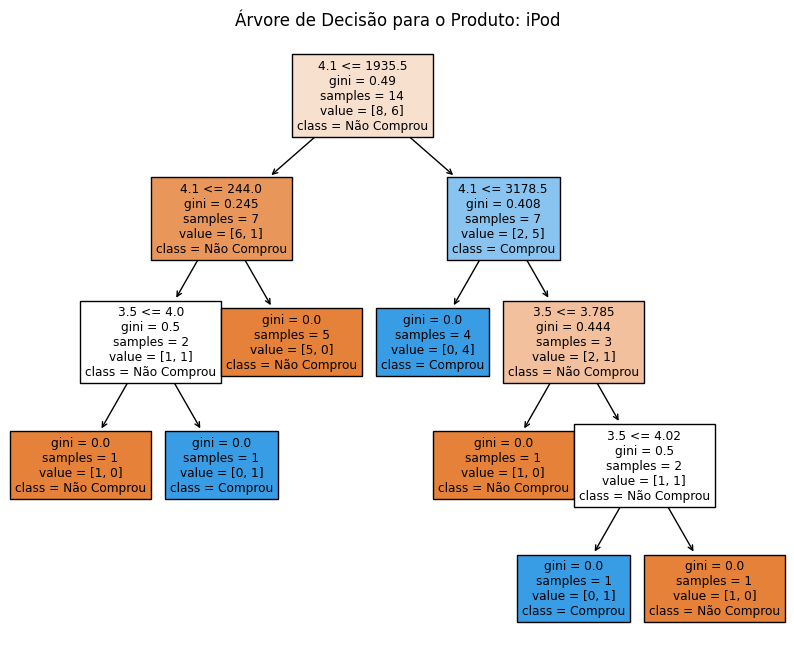


--
Árvore de Decisão do Produto: Notebook
--

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.5
Precision Score: 0.3333333333333333
Recall Score: 1.0
Confusion Matrix:
[[1 2]
 [0 1]]



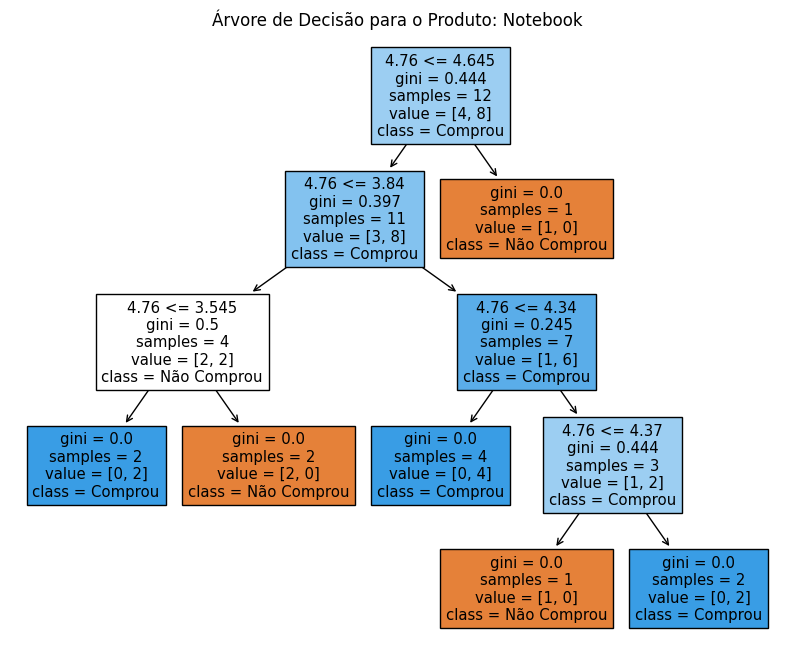

In [374]:
products = df['Nome do Produto'].unique()

for product in products:
    print(f"\n--\nÁrvore de Decisão do Produto: {product}\n--\n")
    
    product_df = df.loc[df['Nome do Produto'] == product]

    X = product_df.drop(['Comprou', 'Nome do Produto'], axis=1)
    y = product_df['Comprou']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier()

    model = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)

    print('Avaliação do Modelo: \n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_pred)}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

    product_df['Comprou'] = product_df['Comprou'].replace([1, 0], ['Comprou', 'Não Comprou'])

    fig = plt.figure(figsize=(10, 8))

    plot_tree(model, feature_names=product_df["Avaliação"].tolist(), class_names=['Não Comprou', 'Comprou'], filled=True)
    plt.title(f'Árvore de Decisão para o Produto: {product}')
    plt.show()


In [375]:
import warnings
warnings.filterwarnings('ignore')

Os modelos de árvore de decisão são eficazes para prever as compras dos consumidores com base nas avaliações, pois identificam padrões relevantes no comportamento do consumidor. No entanto, eles podem não ser suficientes sozinhos. Para melhorar a acurácia das previsões, é importante considerar parâmetros adicionais e técnicas complementares, como o uso de variáveis extras e métodos de ensemble. Assim, uma abordagem mais integrada pode potencializar ainda mais a eficácia das previsões.